In [1]:
import pandas as pd
import pandas as pd
import os
import pandas as pd
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../preds/ensemble.inference.simple.rf.csv")
df

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,OTHER
0,100_20130204_110843_l_カラー眼底,1.000000,0.006667,0.040000,0.000000,0.133333,0.000000,0.006667,0.000000,0.02,...,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000
1,100_20130204_110843_r_カラー眼底,1.000000,0.000000,0.000000,0.180000,0.000000,0.000000,0.040000,0.026667,0.00,...,0.0,0.000000,0.0,0.0,0.00,0.006667,0.0,0.000000,0.000000,0.000000
2,101_20050905_134530_l_カラー眼底,0.986667,0.006667,0.006667,0.006667,0.000000,0.000000,0.020000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.00,0.006667,0.0,0.000000,0.006667,0.000000
3,101_20050905_134530_r_カラー眼底,0.980000,0.020000,0.000000,0.020000,0.006667,0.006667,0.006667,0.006667,0.00,...,0.0,0.000000,0.0,0.0,0.06,0.000000,0.0,0.000000,0.006667,0.000000
4,101_20120702_130425_l_カラー眼底,0.966667,0.020000,0.013333,0.006667,0.000000,0.006667,0.006667,0.013333,0.00,...,0.0,0.000000,0.0,0.0,0.02,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,c96_20181213_100220_l_カラー眼底,0.933333,0.000000,0.000000,0.013333,0.060000,0.013333,0.006667,0.333333,0.00,...,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.013333,0.000000,0.020000
684,c97_20160516_113710_r_カラー眼底,0.513333,0.000000,0.000000,0.000000,0.240000,0.006667,0.000000,0.000000,0.00,...,0.0,0.013333,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000
685,c98_20160516_113710_l_カラー眼底,0.706667,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000
686,c99_20210623_124732_r_カラー眼底,1.000000,0.000000,0.253333,0.006667,0.013333,0.000000,0.020000,0.026667,0.00,...,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.000000


In [3]:
df_processed = df.filter(items=['ID','RP'])
df_processed = df_processed.sort_values('ID')
df_processed

,ID,RP
0,100_20130204_110843_l_カラー眼底,0.000000
1,100_20130204_110843_r_カラー眼底,0.000000
2,101_20050905_134530_l_カラー眼底,0.006667
3,101_20050905_134530_r_カラー眼底,0.006667
4,101_20120702_130425_l_カラー眼底,0.000000
...,...,...
683,c96_20181213_100220_l_カラー眼底,0.000000
684,c97_20160516_113710_r_カラー眼底,0.000000
685,c98_20160516_113710_l_カラー眼底,0.000000
686,c99_20210623_124732_r_カラー眼底,0.000000


In [4]:
df_answer = pd.read_csv("../storage/data_Labels.csv")
df_answer_processed = df_answer.filter(items=['ID','RP'])
df_answer_processed = df_answer_processed.sort_values('ID')
df_answer_processed

,ID,RP
173,100_20130204_110843_l_カラー眼底.png,1
174,100_20130204_110843_r_カラー眼底.png,1
176,101_20050905_134530_l_カラー眼底.png,1
175,101_20050905_134530_r_カラー眼底.png,1
177,101_20120702_130425_l_カラー眼底.png,1
...,...,...
679,c96_20181213_100220_l_カラー眼底.png,0
680,c97_20160516_113710_r_カラー眼底.png,0
681,c98_20160516_113710_l_カラー眼底.png,0
682,c99_20210623_124732_r_カラー眼底.png,0


In [5]:
df_probability = pd.merge(df_answer_processed,df_processed, how='left',on =  "ID")
df_probability.to_csv("prediction_rf.csv")
df_probability

,ID,RP_x,RP_y
0,100_20130204_110843_l_カラー眼底.png,1,NaN
1,100_20130204_110843_r_カラー眼底.png,1,NaN
2,101_20050905_134530_l_カラー眼底.png,1,NaN
3,101_20050905_134530_r_カラー眼底.png,1,NaN
4,101_20120702_130425_l_カラー眼底.png,1,NaN
...,...,...,...
683,c96_20181213_100220_l_カラー眼底.png,0,NaN
684,c97_20160516_113710_r_カラー眼底.png,0,NaN
685,c98_20160516_113710_l_カラー眼底.png,0,NaN
686,c99_20210623_124732_r_カラー眼底.png,0,NaN


In [6]:
df_list = df_processed["RP"].values.tolist()
df_answer_list = df_answer_processed["RP"].values.tolist()

In [7]:
roc = roc_curve(df_answer_list,df_list)

In [8]:
fpr, tpr, thresholds = roc

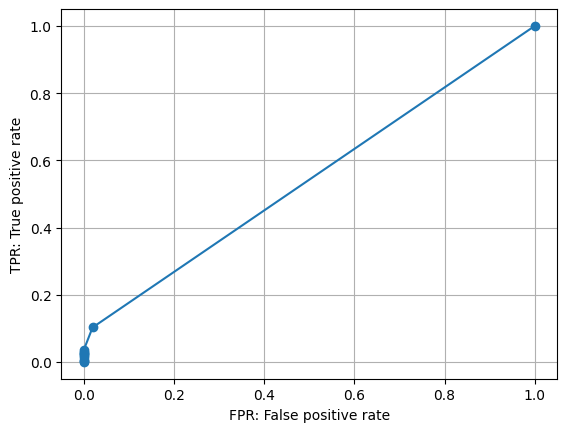

In [9]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.savefig('ROC_curve_rf.pdf')

In [10]:
from sklearn.metrics import roc_auc_score
import numpy as np
print(roc_auc_score(df_answer_list,df_list))

0.5419218322130944


0.8634949602785311


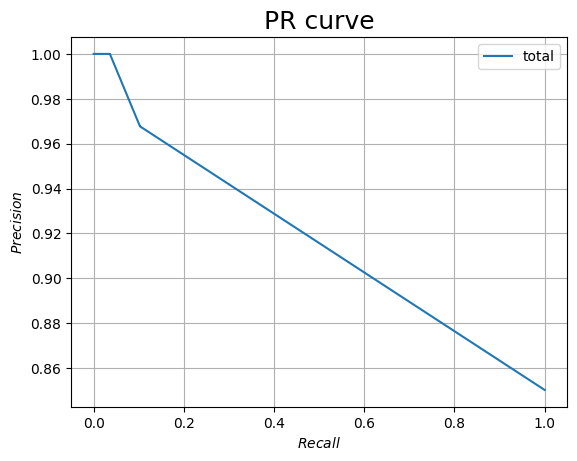

In [11]:
roc = precision_recall_curve(df_answer_list,df_list)
presicion, recall, thresholds = roc

plt.plot(recall, presicion, marker=',',label="total")
print(average_precision_score(df_answer_list,df_list,average="micro"))


plt.xlabel(r"$Recall$")
plt.ylabel(r"$Precision$")
plt.grid()

plt.legend()
plt.title("PR curve",fontsize=18)
plt.savefig('PR_curve_rf.pdf', bbox_inches="tight", pad_inches=0.05)